In [4]:
 import numpy as np
import pathlib as pl
import os
import pandas as pd
import warnings
warnings.simplefilter("ignore")
import pickle
import matplotlib.pyplot as plt
import matplotlib as mpl

Notebook for plotting figures from the learning curve data where we plot RMSE and NLPD against number of data points
for the different test cases

In [25]:
path = pl.Path.home()/ 'Transfer_Learning_GP_Results'
n_new_fun = 10
surface_types = ['unrelated', 'linear_relation', 'non-linear_relation', ]
# surface_type = 'unrelated_two_observed_10_new' #'non-linear_relation_two_observed_six_new' #'linear_relation' #'unrelated' #'non-linear_relation'
results_list = []
for n_new_points in range(2,30):
    for surface_type in surface_types:
        for seed in [1, 2, 3]:
            for data_seed in range(6):
                for restarts in [1, 2, 3]:
                    # print(path/f'hyperparameters/hyperparameters_{surface_type}_{n_new_points}_points_seed_{seed}.pkl')
                    if os.path.exists(path/f'results/results_{surface_type}_{n_new_points}_{n_new_fun}_{seed}_dataseed_{data_seed}.pkl'):
                        with open(path/f'results/results_{surface_type}_{n_new_points}_{n_new_fun}_{seed}_dataseed_{data_seed}.pkl', 'rb') as f:
                            df = pickle.load(f)
                            df['n_new_points'] = n_new_points
                            df['seed'] = seed
                            df['data_seed'] = data_seed
                            df['surface_type'] = surface_type
                            results_list.append(df)

In [26]:
results_df = pd.concat(results_list, ignore_index=True)

In [27]:
print(results_df)


        model        nlpd      rmse  nlpd_new_surface  rmse_new_surface  \
0     mo_indi    0.550313  0.884334          0.991843          0.968540   
1      lvmogp   29.997533  1.251678         36.275571          1.370896   
2         lmc  293.010836  2.605016        351.964755          2.853589   
3         avg    1.944349  1.610985          2.003733          1.673189   
4     mo_indi    0.550313  0.884334          0.991843          0.968540   
...       ...         ...       ...               ...               ...   
7591      avg   -0.593662  0.132693         -0.695077          0.116078   
7592  mo_indi   -1.872739  0.027301         -1.863370          0.028118   
7593   lvmogp   -1.987511  0.017102         -1.999253          0.015483   
7594      lmc   -1.981311  0.023528         -1.979889          0.023815   
7595      avg   -0.593662  0.132693         -0.695077          0.116078   

             lml  seed  n_new_points         surface_type  n_new_fun  \
0      -0.471535     1     

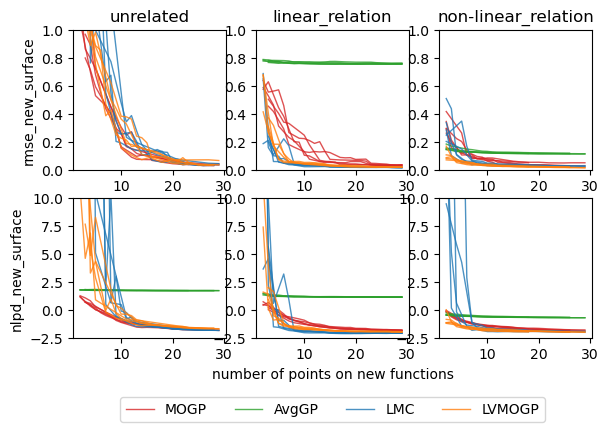

In [79]:
def get_colors():
    cols = plt.rcParams['axes.prop_cycle'].by_key()['color']
    colors = {'lmc': cols[0], 'mo_indi': cols[3], 'lvmogp': cols[1], 'avg': cols[2]}
    return colors

model_names =['mo_indi', 'avg', 'lmc', 'lvmogp', ]
colors = get_colors()

surface_type_names = {'unrelated_two_observed_10_new':'Uncorrelated','linear_relation_two_observed_10_new':'Linearly\nCorrelated',
                 'non-linear_relation_two_observed_10_new':'Non-Linearly\nCorrelated'}
mod_names = {'mo_indi':'MOGP', 'lmc':'LMC', 'avg':'AvgGP', 'lvmogp':'LVMOGP'}
cm = 1/2.54
fig, axs = plt.subplots(nrows=2, ncols=3, figsize=(17*cm, 4))
seed = 2

for i, surface_type in enumerate(surface_types):
    for j, metric in enumerate(['rmse_new_surface', 'nlpd_new_surface']):
        for k, model_name in enumerate(model_names):
            for data_seed in results_df['data_seed'].unique():
                temp_df = results_df[(results_df['surface_type'] == surface_type)
                                     & (results_df['model'] == model_name) & (results_df['seed'] == seed)
                & (results_df['data_seed'] == data_seed)]
                if data_seed == 1:
                    label=mod_names[model_name]
                else: label = None
                axs[j, i].plot(temp_df['n_new_points'], temp_df[metric], alpha=0.8,   color=colors[model_name], linewidth=1,
                               label=label)
        axs[j, 0].set_ylabel(metric)
    axs[0, i].set_title(surface_type)
    axs[1, i].set_ylim(-2.5, 10)
    axs[0, i].set_ylim(0, 1)
axs[1, 1].set_xlabel('number of points on new functions')
axs[1, 1].legend( bbox_to_anchor=(0.5, -0.65), loc='lower center', ncol=4)
# plt.tight_layout()

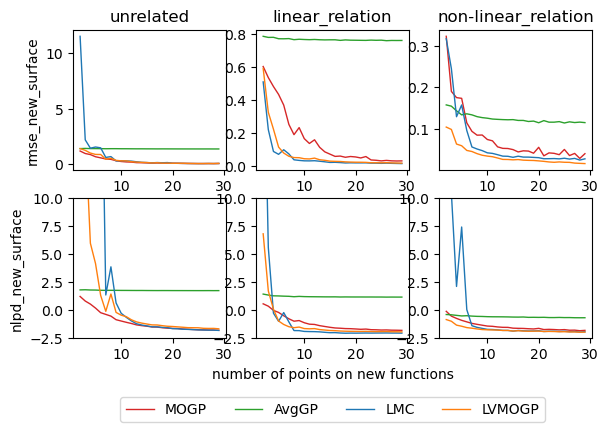

In [78]:
fig, axs = plt.subplots(nrows=2, ncols=3, figsize=(17*cm, 4))
seed = 2

for i, surface_type in enumerate(surface_types):
    for j, metric in enumerate(['rmse_new_surface', 'nlpd_new_surface']):
        for k, model_name in enumerate(model_names):
                temp_df_ = results_df[(results_df['surface_type'] == surface_type)
                                     & (results_df['model'] == model_name) & (results_df['seed'] == seed)]
                temp_df = temp_df_.groupby('n_new_points').mean().reset_index()
                temp_df_min = temp_df_.groupby('n_new_points').min().reset_index()
                temp_df_max = temp_df_.groupby('n_new_points').max().reset_index()
                axs[j, i].plot(temp_df['n_new_points'], temp_df[metric],  color=colors[model_name], linewidth=1,
                               label=mod_names[model_name])
                # axs[j, i].fill_between(temp_df['n_new_points'], temp_df[metric]+temp_df_min[metric],
                #                        temp_df[metric]-temp_df_min[metric], alpha=0.2,  color=colors[model_name])
        axs[j, 0].set_ylabel(metric)
    axs[0, i].set_title(surface_type)
    axs[1, i].set_ylim(-2.5, 10)
    # axs[0, i].set_ylim(0, 1)
axs[1, 1].set_xlabel('number of points on new functions')
axs[1, 1].legend( bbox_to_anchor=(0.5, -0.65), loc='lower center', ncol=4)